# Problem 2 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [ ]:
import torchvision

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [ ]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 115714050.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30036125.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32677619.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8694901.31it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [ ]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]), type(train_dataset[0][0][0]))

print(len(test_dataset))

60000 <class 'torch.Tensor'> <class 'int'> <class 'torch.Tensor'>
10000


We can convert images to numpy arrays and plot them with matplotlib:

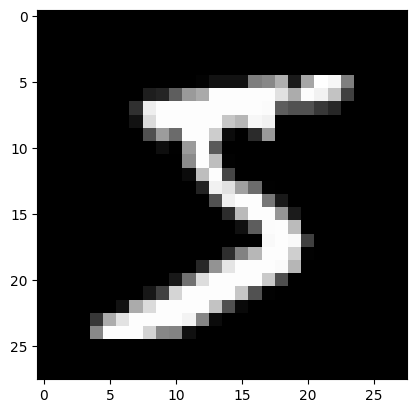

In [ ]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Network Definition
Let's instantiate a model and take a look at the layers.

In [ ]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),
    nn.Linear(784, 20),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(20, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=20, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
)


## Training
We also choose an optimizer and a loss function.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

We could write our training procedure manually and directly index the `Dataset` objects, but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

We now write our backpropagation loop, training for 10 epochs.

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()

        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.6356
Train Epoch: 2  Loss: 0.7600
Train Epoch: 3  Loss: 0.8246
Train Epoch: 4  Loss: 0.5607
Train Epoch: 5  Loss: 0.5503
Train Epoch: 6  Loss: 0.6508
Train Epoch: 7  Loss: 0.5024
Train Epoch: 8  Loss: 0.5953
Train Epoch: 9  Loss: 0.5384
Train Epoch: 10  Loss: 0.8604


## Testing
We can perform forward passes through the network without saving gradients.

In [ ]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0079, Accuracy: 9290/10000 (92.9000)


In [ ]:
# PART C

In [ ]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(100, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()

        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.1832
Train Epoch: 2  Loss: 0.1038
Train Epoch: 3  Loss: 0.3108
Train Epoch: 4  Loss: 0.1213
Train Epoch: 5  Loss: 0.2333
Train Epoch: 6  Loss: 0.0271
Train Epoch: 7  Loss: 0.0267
Train Epoch: 8  Loss: 0.1280
Train Epoch: 9  Loss: 0.0524
Train Epoch: 10  Loss: 0.1977


In [ ]:
# PART C TESTING

# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0024, Accuracy: 9777/10000 (97.7700)


In [ ]:
# PART D

In [ ]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),
    nn.Linear(784, 130),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(130, 70),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(70, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=130, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=130, out_features=70, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=70, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=40, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=40, shuffle=True)

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

x = 1

for epoch in range(25):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()



        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()

        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.0270
Train Epoch: 2  Loss: 0.0427
Train Epoch: 3  Loss: 0.0165
Train Epoch: 4  Loss: 0.1157
Train Epoch: 5  Loss: 0.1036
Train Epoch: 6  Loss: 0.0458
Train Epoch: 7  Loss: 0.0108
Train Epoch: 8  Loss: 0.1977
Train Epoch: 9  Loss: 0.0212
Train Epoch: 10  Loss: 0.0338
Train Epoch: 11  Loss: 0.0920
Train Epoch: 12  Loss: 0.1323
Train Epoch: 13  Loss: 0.0012
Train Epoch: 14  Loss: 0.0528
Train Epoch: 15  Loss: 0.0336
Train Epoch: 16  Loss: 0.0052
Train Epoch: 17  Loss: 0.0018
Train Epoch: 18  Loss: 0.0005
Train Epoch: 19  Loss: 0.0841
Train Epoch: 20  Loss: 0.0162
Train Epoch: 21  Loss: 0.0253
Train Epoch: 22  Loss: 0.0256
Train Epoch: 23  Loss: 0.0193
Train Epoch: 24  Loss: 0.0074
Train Epoch: 25  Loss: 0.0037


In [ ]:
# PART D TESTING

# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0021, Accuracy: 9824/10000 (98.2400)


In [ ]:
def test_model(first_nodes, dropout):
  print(first_nodes)
  print(200 - first_nodes)
  model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),
    nn.Linear(784, first_nodes),
    nn.ReLU(),
    nn.Dropout(dropout),
    nn.Linear(first_nodes, 200-first_nodes),
    nn.ReLU(),
    nn.Dropout(dropout),
    nn.Linear(200 - first_nodes, 10)
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  loss_fn = nn.CrossEntropyLoss()

  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=40, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=40, shuffle=True)

  model.train()

  for epoch in range(20):
      for batch_idx, (data, target) in enumerate(train_loader):
          # Erase accumulated gradients
          optimizer.zero_grad()



          # Forward pass
          output = model(data)

          # Calculate loss
          loss = loss_fn(output, target)

          # Backward pass
          loss.backward()

          # Weight update
          optimizer.step()

      # Track loss each epoch
      # print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

  model.eval()

  test_loss = 0
  correct = 0

  # Turning off automatic differentiation
  with torch.no_grad():
      for data, target in test_loader:
          output = model(data)
          test_loss += loss_fn(output, target).item()  # Sum up batch loss
          pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
          correct += pred.eq(target.view_as(pred)).sum().item()

  print('worked: {:.4f}'.format(100. * correct / len(test_loader.dataset)))
  return 100. * correct / len(test_loader.dataset)

In [ ]:

first_node = {}

for i in range(0, 6, 1):
  result = test_model(130, i / 10)
  first_node[i] = result

130
70
worked: 97.8200
130
70
worked: 97.8300
130
70
worked: 98.0700
130
70
worked: 97.8700
130
70
worked: 97.8000
130
70


KeyboardInterrupt: 

In [ ]:
# PART E

In [ ]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(500, 350),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(350, 150),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(150, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=500, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=500, out_features=350, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=350, out_features=150, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.2, inplace=False)
  (10): Linear(in_features=150, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=40, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=40, shuffle=True)

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

x = 1

for epoch in range(25):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()



        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()

        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.1196
Train Epoch: 2  Loss: 0.0961
Train Epoch: 3  Loss: 0.0294
Train Epoch: 4  Loss: 0.2170
Train Epoch: 5  Loss: 0.1041
Train Epoch: 6  Loss: 0.0218
Train Epoch: 7  Loss: 0.0547
Train Epoch: 8  Loss: 0.0406
Train Epoch: 9  Loss: 0.0274
Train Epoch: 10  Loss: 0.1339
Train Epoch: 11  Loss: 0.0017
Train Epoch: 12  Loss: 0.0243
Train Epoch: 13  Loss: 0.0003
Train Epoch: 14  Loss: 0.0166
Train Epoch: 15  Loss: 0.0188
Train Epoch: 16  Loss: 0.0031
Train Epoch: 17  Loss: 0.0205
Train Epoch: 18  Loss: 0.0002
Train Epoch: 19  Loss: 0.1232
Train Epoch: 20  Loss: 0.0000
Train Epoch: 21  Loss: 0.0003
Train Epoch: 22  Loss: 0.0758
Train Epoch: 23  Loss: 0.0532
Train Epoch: 24  Loss: 0.0034
Train Epoch: 25  Loss: 0.0220


In [ ]:
# PART D TESTING

# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0023, Accuracy: 9836/10000 (98.3600)
